<CENTER><img src="http://opendata.atlas.cern/DataAndTools/pictures/ATLASOD.gif" style="width:50%"></CENTER>

<CENTER><h1>Searching for the Higgs boson in the H&#8594;&gamma;&gamma; channel</h1></CENTER>
## Python notebook example

**Introduction**
Let's take a current ATLAS Open Data sample and create a histogram:

In [135]:
import ROOT
from ROOT import TMath
import time

from ROOT import TCanvas, TFile, TPaveText, TGraphErrors
from ROOT import gROOT, gBenchmark



from array import array

In [136]:
start = time.time()

Because we would like to use more than one ROOT input file, the best option is to use a TChain object. This allows to "chain" several samples into a single structure that we can later loop over

In [137]:
f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/2019/GamGam/Data/dataA_yy.root")
    #("Data/dataA_yy.root")
    #("Data/dataB_yy.root")
    #("Data/dataC_yy.root")
    #("Data/dataD_yy.root")

In [138]:
canvas = ROOT.TCanvas("Canvas","cz",1000,1000)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Canvas


In [139]:
tree = f.Get("mini")

Now we're going to extract the photons variables

In [140]:
#Invariant mass histograms definition
hist = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",50,80,280)

Here we're filling the variables defined above with the content of those inside the input ntuples

We're creating a histogram for this example. The plan in to fill them with events.

We are selecting below a simple look for them.

The Higgs boson analysis implemented here considers Higgs boson decays into a proton-proton pair. The event selection criteria are:

In [221]:
canvas = ROOT.TCanvas("Canvas","cz",1000,1000)
tree = f.Get("mini")
hist = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",50,80,280)

n_read = 100000

Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
#n = 0
for n, event in enumerate(tree):
    #####n += 1
    ## printing the evolution in number of events
    #if(n % (n_read / 500) == 0):
    if(n % 100000 == 0):
        print(n)
    if( n > n_read ):
        break
    ## checking the trigger    
    if(tree.trigP):
        goodphoton_index = [0]*5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j=0
        ## looping the photons per event
        for j in range(tree.photon_n):
            ##
            if(tree.photon_isTightID[j]):
                ##
                if(tree.photon_pt[j] > 25000 and (TMath.Abs(tree.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree.photon_eta[j]) < 1.37 or TMath.Abs(tree.photon_eta[j]) > 1.52)):
                    ##
                    goodphoton_n += 1  #count
                    goodphoton_index[photon_index]=j
                    photon_index += 1
                ## end Pt and eta pre-selection
            ## end on request of quality of the photon
        ## end looping photons in the current event
            
        ## Using the two selected photons
        if(goodphoton_n==2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            ## Getting couple of photons with good isolation 
            if((tree.photon_ptcone30[goodphoton1_index]/tree.photon_pt[goodphoton1_index] < 0.065)\
               and (tree.photon_etcone20[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree.photon_ptcone30[goodphoton2_index]/tree.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree.photon_etcone20[goodphoton2_index] / tree.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree.photon_pt[goodphoton1_index]/1000., tree.photon_eta[goodphoton1_index],\
                                          tree.photon_phi[goodphoton1_index],tree.photon_E[goodphoton1_index]/1000.)
                    Photon_2.SetPtEtaPhiE(tree.photon_pt[goodphoton2_index]/1000., tree.photon_eta[goodphoton2_index],\
                                          tree.photon_phi[goodphoton2_index],tree.photon_E[goodphoton2_index]/1000.)
                    ## Adding the two TLorentz vectors
                    Photon_12 = Photon_1 + Photon_2
                    ## Filling with the mass of the gamma-gamma system
                    hist.Fill(Photon_12.M())
                ## end isolation photon #2
            ## end isolation photon #1
        ## end 2-good photons
    ## end of trigger request
## End loop in the events


#hist.Draw()
#canvas.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Canvas
TWebFile::Append:0: RuntimeWarning: Replacing existing TH1: h_M_Hyy (Potential memory leak).


0
100000


#### Final plot

#### Log Scale

In [233]:
g1 = TF1( 'g1', 'gaus',  85,  95 )


NameError: name 'TF1' is not defined

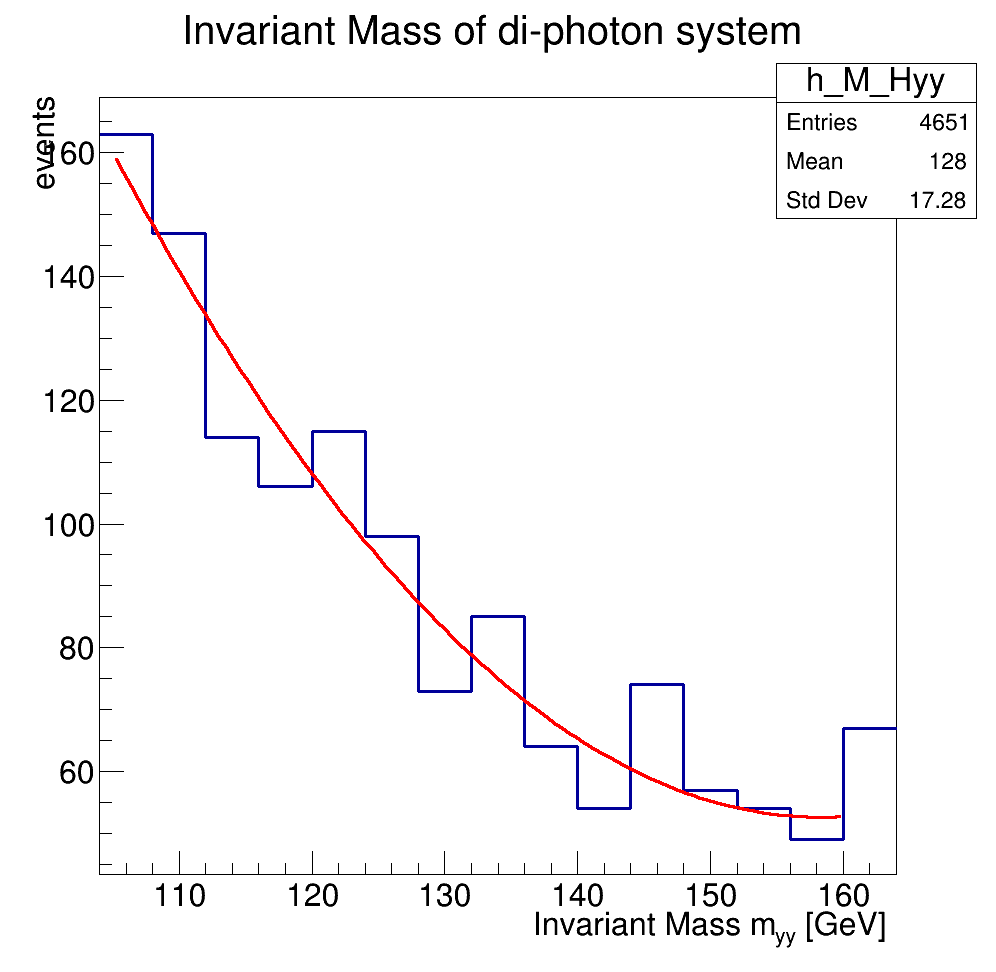

In [370]:
#fitResultPtr2 = hist.Fit('gaus')
specific_range = (105,  160)
g1 = TF1( 'g1', 'pol2',  specific_range[0],  specific_range[1] )
#fitResultPtr = hist.Fit("pol3","S")
#fitResultPtr2 = hist.Fit("gaus","S")

#hist.Fit( g1, 'gaus' )
hist.Fit( g1, 'R' )
#hist.Fit( g1, 'pol1' )

#chi2_nparams = (fitResultPtr.Chi2(), fitResultPtr.NFreeParameters())
#print "The final Chi2 value was %.2f and the number of free parameters was %d" %chi2_nparams
#fitResultPtr.Draw()
#fitResultPtr2.Draw()
g1.GetParameters()
#g1.Draw()
hist.SetAxisRange(specific_range[0],  specific_range[1])

canvas.Draw()



In [364]:
param0, param1, param2 = g1.GetParameters()[0], g1.GetParameters()[1], g1.GetParameters()[2]

In [365]:
def fitFunc(x):
    return (x**2)*param2 + (x**1)*param1 + param0

In [366]:
fitResultPtr(140)

65.31966888559714

In [367]:
hist.Fit("pol3","S")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Canvas2
TWebFile::Append:0: RuntimeWarning: Replacing existing TH1: net (Potential memory leak).


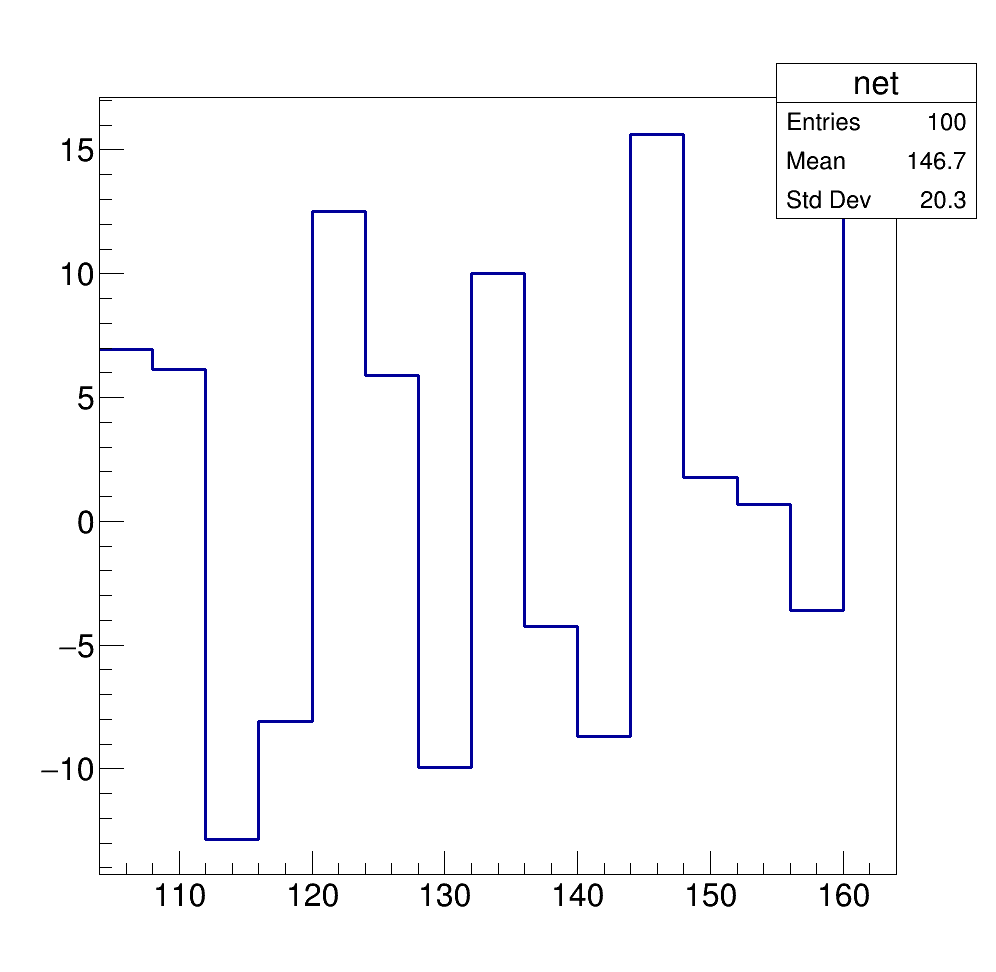

In [368]:
canvas2 = ROOT.TCanvas("Canvas2","cz",1000,1000)

net = TH1F("net","",hist.GetNbinsX(),80,280)
for i in range(1,hist.GetNbinsX()+1):
    x=hist.GetBinCenter(i)
    y=fitFunc(x)    
    net.SetBinContent(i,hist.GetBinContent(i)-y)
    #print(net.SetBinContent(i,hist.GetBinContent(i)-y))
    #print(hist.GetBinContent(i)-y)
    net.SetBinContent(1,1)
net.Draw()
net.SetAxisRange(specific_range[0],  specific_range[1])



canvas2.Draw()

In [42]:
chi2_nparams[0], chi2_nparams[1]

(23.240602734692636, 3L)

In [133]:
fitResultPtr

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2


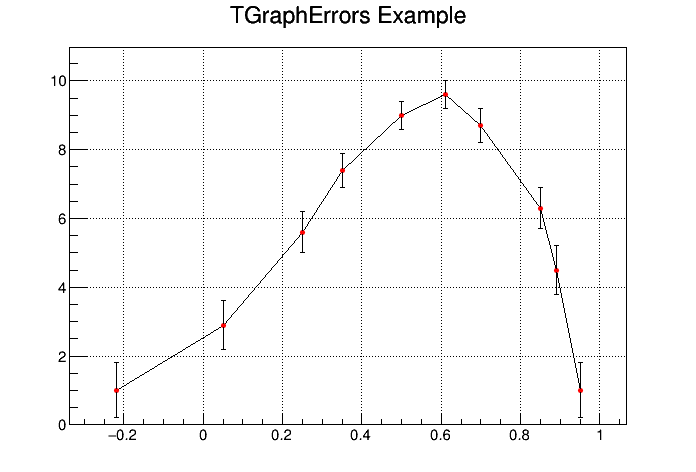

In [307]:
c2 = TCanvas( 'c2', 'A Simple Graph with error bars', 200, 10, 700, 500 )
c2.SetGrid()
#c2.GetFrame().SetFillColor( 21 )
#c2.GetFrame().SetBorderSize( 12 )
n = 10;
array([])
x  = array( 'f', [ -0.22, 0.05, 0.25, 0.35,  0.5, 0.61,  0.7, 0.85, 0.89, 0.95 ] )
ex = array( 'f', [ 0,  0, 0, 0, 0, 0, 0, 0, 0, 0] )
y  = array( 'f', [     1,  2.9,  5.6,  7.4,  9.0,  9.6,  8.7,  6.3,  4.5,    1 ] )
ey = array( 'f', [  0.8,  0.7,  0.6,  0.5,  0.4,  0.4,  0.5,  0.6,  0.7,  0.8  ] )
gr = TGraphErrors( n, x, y, ex, ey )
gr.SetTitle( 'TGraphErrors Example' )
gr.SetMarkerColor( 2 )
gr.SetMarkerStyle( 20 )
gr.Draw( 'ALP' )
#c2.Update()
c2.Draw()

In [246]:
from ROOT import TH1F, TF1
from ROOT import gROOT
from array import array
x = ( 1.913521, 1.953769, 2.347435, 2.883654, 3.493567,
      4.047560, 4.337210, 4.364347, 4.563004, 5.054247,
      5.194183, 5.380521, 5.303213, 5.384578, 5.563983,
      5.728500, 5.685752, 5.080029, 4.251809, 3.372246,
      2.207432, 1.227541, 0.8597788,0.8220503,0.8046592,
      0.7684097,0.7469761,0.8019787,0.8362375,0.8744895,
      0.9143721,0.9462768,0.9285364,0.8954604,0.8410891,
      0.7853871,0.7100883,0.6938808,0.7363682,0.7032954,
      0.6029015,0.5600163,0.7477068,1.188785, 1.938228,
      2.602717, 3.472962, 4.465014, 5.177035 )
np = len(x)
h = TH1F( 'h', 'Example of several fits in subranges', np, 85, 134 )
h.SetMaximum( 7 )
for i in range(np):
   h.SetBinContent( i+1, x[i] )
par = array( 'd', 9*[0.] )
g1 = TF1( 'g1', 'gaus',  85,  95 )
g2 = TF1( 'g2', 'gaus',  98, 108 )
g3 = TF1( 'g3', 'gaus', 110, 121 )
total = TF1( 'total', 'gaus(0)+gaus(3)+gaus(6)', 85, 125 )
total.SetLineColor( 2 )
h.Fit( g1, 'S' )
h.Fit( g2, 'S' )
h.Fit( g3, 'S')
par1 = g1.GetParameters()
par2 = g2.GetParameters()
par3 = g3.GetParameters()
par[0], par[1], par[2] = par1[0], par1[1], par1[2]
par[3], par[4], par[5] = par2[0], par2[1], par2[2]
par[6], par[7], par[8] = par3[0], par3[1], par3[2]
total.SetParameters( par )
h.Fit( total, 'S' )
h.Draw()

TWebFile::Append:0: RuntimeWarning: Replacing existing TH1: h (Potential memory leak).


In [243]:
h.Draw()


"h" is of pointer type. Use this operator: ->

variable "h.D" not defined.
